# **CIS 419/519 Homework 1 - Spring 2022**

**Before starting, you must click on the "Copy To Drive" option in the top bar. Go to File --> Save a Copy to Drive. This is the master notebook so <u>you will not be able to save your changes without copying it </u>! Once you click on that, make sure you are working on that version of the notebook so that your work is saved** 

In [1]:
import random 
import numpy as np
import pandas as pd
import os

In [2]:
# For autogreader only, do not modify this cell. 
# True for Google Colab, False for autograder
NOTEBOOK = (os.getenv('IS_AUTOGRADER') is None)
if NOTEBOOK:
    print("[INFO, OK] Google Colab.")
else:
    print("[INFO, OK] Autograder.")

[INFO, OK] Google Colab.


## **PennGrader Setup**
First, you'll need to set up the PennGrader, an autograder we are going to use throughout the semester. The PennGrader will automatically grade your answer and provide you with an instant feedback. Unless otherwise stated, you can resubmit up to a reasonable number of attempts (e.g. 100 attemptes per day). **We will only record your latest score in our backend database**. 

After finishing each homework assignment, you must submit your iPython notebook to gradescope before the homework deadline. Gradescope will then retrive and display your scores from our backend database. 

In [3]:
%%capture
!pip3 install penngrader --upgrade

In [4]:
from penngrader.grader import *

## **Autograder Setup**
Enter your 8-digit PennID below:

In [5]:
#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 87030462          # YOUR PENN-ID GOES HERE AS AN INTEGER#

Run the following cell to initialize the autograder. This autograder will let you submit your code directly from this notebook and immediately get a score.

**NOTE:** Remember we store your submissions and check against other student's submissions... so, not that you would, but no cheating.

In [6]:
grader = PennGrader(homework_id = 'CIS_519_Spring22_HW1', student_id = STUDENT_ID)

PennGrader initialized with Student ID: 87030462

Make sure this correct or we will not be able to store your grade


## **Datasets**
Next, we will download all datasets from Google Drive to your local runtime. After successful download, you may verify that all datasets are present in your colab instance.

HW1 Datasets:
- [cis519_hw1_diabetes_train.csv](https://drive.google.com/file/d/1wfZ375m-HOvtWb8fBUjZ2zbW5nkXtlVx/view?usp=sharing)
- [cis519_hw1_diabetes_test.csv](https://drive.google.com/file/d/14DGsr_eIHRGnDw4o7FVBFUVfg_MljzzO/view?usp=sharing)

In [7]:
if NOTEBOOK:
    if not os.path.exists("cis519_hw1_diabetes_train.csv"):
        !gdown --id 1wfZ375m-HOvtWb8fBUjZ2zbW5nkXtlVx
    if not os.path.exists("cis519_hw1_diabetes_X_test.csv"):
        !gdown --id 14DGsr_eIHRGnDw4o7FVBFUVfg_MljzzO

Downloading...
From: https://drive.google.com/uc?id=1wfZ375m-HOvtWb8fBUjZ2zbW5nkXtlVx
To: /content/cis519_hw1_diabetes_train.csv
100% 525k/525k [00:00<00:00, 16.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=14DGsr_eIHRGnDw4o7FVBFUVfg_MljzzO
To: /content/cis519_hw1_diabetes_X_test.csv
100% 126k/126k [00:00<00:00, 56.1MB/s]


#### **NOTE: Results of sections marked as "manually graded" should be submitted along with the written homework solutions.**

# **1. K-Nearest Neighbors [10 pts]**
While doing classification, KNN searches the memorized training instances for the K instances that most closely resemble the new instance and assigns to it the most common class. An alternate way of understanding KNN is by looking at the learned decision boundaries. In this problem, you will implement a function to classify points in the X-Y coordinates using [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). The training dataset used is the [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris), and each point in the 2d-space will be classified into one of the three classes using its x-coordinate(sepal length) and y-coordinate(sepal width).

## **1.1. Load Iris Dataset**
Please complete the load_dataset function to
- Populate X_train with iris dataset features. We use only the sepal length and width for this exercise, i.e. the first two columns in the dataset
- Populate y_train with labels (species)
- return X_train and y_train

In [8]:
from sklearn import datasets

def load_iris_dataset():
    '''
    Args:
        None
    Returns: X_train, y_train
    Notes:
        1. Please do not change the provided code
    '''
    # import training data
    iris = datasets.load_iris()

    # TODO:
    # Examine the iris variable and initialize the following variables appropriately:
    # 1. X_train - Shape (m, 2): Only use the sepal length and width
    # 2. y_train - Shape (m, ): target labels 
    #### Student code starts ####
    X_train = iris.data[:, :2]
    y_train = iris.target
    return X_train, y_train
    #### Student code ends ####

# Load the iris dataset first
X_train, y_train = load_iris_dataset()

## **1.2. Standardise the Features [4 pts, autograded]**
Please complete the standardise_features function to 
standardize the features by subtracting the mean and scaling to unit variance. i.e 

 z = (x - u) / s

where u is the mean of the training data and s is the standard deviation of the training data.

Here, centering and scaling need to happen independently on each feature (column) of the training data.

**Note**: 

Please implement this function yourself. 

**Do NOT use sklearn's StandardScaler**. 

You are encouraged to use numpy as well as numpy vectorisation/broadcasting techniques to speed up the calculations.

In [9]:
def standardise_features(X_train):

  '''
  Args:
      X_train: Training dataset
  Returns: X_train (After Standardization)
  Notes:
      1. Please do not change the provided code
  '''

  # TODO:
  # 1. Calculate columnwise means and standard deviations
  # 2. Perform columnwise standardisation i.e. subtract off mean and divide by standard deviation
  # 3. Return the standardised data
  #### Student code starts ####
  mean = np.mean(X_train, axis=0)
  std = np.std(X_train, axis=0)
  return (X_train - mean) / std
  #### Student code ends ####

X_train = standardise_features(X_train)

In [10]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_knn_standardise', answer = standardise_features)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **1.3. Plot KNN Decision Boundary [6 pts, manually graded]**
Please complete the plot_KNN_boundary function to
- train a KNN classifier with k neighbors using the provided X_train and y_train
- make predictions using X_test and save the result as 'y_test'

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

def plot_KNN_boundary(k, X_train, y_train):
    '''
    Args:
        k: Number of neighbors to use for kneighbors queries.
        X_train: Training dataset
        y_train: Labels

    Returns:
    Notes:
        1. Please do not change the provided code
        2. save the predicted labels as y_test for plotting
    '''

    # Mesh 2d space into grid to generate X_test and y_test
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
    X_test = np.c_[xx.ravel(), yy.ravel()]
    y_test = np.zeros(xx.shape)

    # TODO:
    # 1. train a KNN classifier
    # 2. save the predictions on X_test in y_test
    #### Student code starts ####
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    y_test = KNN.predict(X_test)
    #### Student code ends ####

    # Put the result into a color plot
    y_test = y_test.reshape(xx.shape)
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ['darkorange', 'c', 'darkblue']
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, y_test, cmap=cmap_light)

    # Also plot the training points
    iris_target_names = ['setosa', 'versicolor', 'virginica']
    sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=map(lambda y: iris_target_names[y], y_train),
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)" % (k))
    plt.xlabel("standardised sepal length")
    plt.ylabel("standardised sepal width")
    plt.show()

Explore the effect of changing k on the learned decision boundaries. 
- Submit the plots along with the written homework solutions. 
- State whether the model underfits/overfits as k increases and explain why.

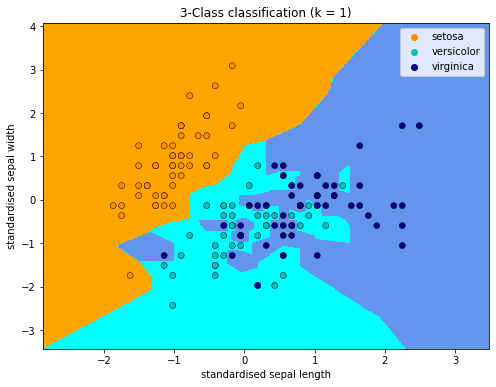

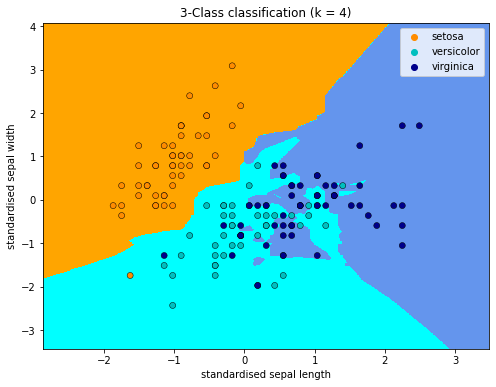

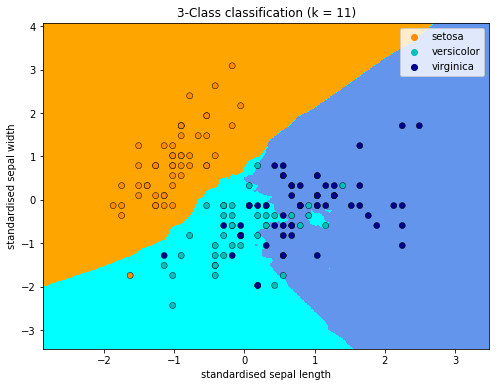

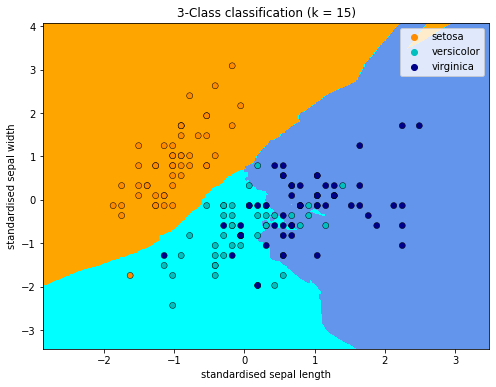

In [12]:
# Plot KNN decision boundaries with different k values
def visualize_KNN(X_train, y_train):

    k_list = [1, 4, 11, 15]
    
    # TODO:
    # 1. Call plot_KNN_boundary function for each value of k in k_list
    #### Student code starts ####
    for k in k_list:
      plot_KNN_boundary(k, X_train, y_train)
    #### Student code ends ####

if NOTEBOOK:
    visualize_KNN(X_train, y_train) ### Comment out this line when submitting ###

# **2. Measures of Impurity and their Reduction [15 pts]**
To grow a classification tree, instead of a binary error (1/0), measures of impurity are used to see how good a leaf node is. Recall that we discussed about entropy being one such measure of impurity. We will be working with entropy and comparing it to another metric called the gini index. 

## **2.1. Measures of Impurity [9 pts]**

For this problem, consider that you have a binary classification problem of two classes, the positive class $1$ and the negative class $0$. 



### **2.1.1. Entropy [2 pts, autograded]**

Please complete the entropy function.

In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt

def cross_entropy(prob_class1):  

    """
    Returns the cross-entropy value of a node given the probability of a sample belonging to class 1 in the node.

    Args: 
        prob_class1: The probability of a sample belonging to class 1 in a decision tree node
      
    Returns:
        ce: The cross-entropy value for the node
    """

    # TODO:
    #### Student code starts ####
    return - (prob_class1 * np.log2(prob_class1) + (1 - prob_class1) * np.log2(1 - prob_class1))
    #### Student code ends #### 
    
assert cross_entropy(0.5) == 1

In [14]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_cross_entropy', answer = cross_entropy)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **2.1.2. Gini Index [2 pts, autograded]**

Gini index is another measure of impurity. For an K-class classification problem, gini index is calculated as follows.

$$\text{Gini Index} = \sum_{k = 1}^{K} p_k(1 - p_k)$$

Complete the following function for calculating the gini index of a binary-class problem (k = 2).

In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt

def gini_index(prob_class1):  

    """
    Returns the gini-index value of a node given the probability of a sample belonging to class 1 in the node.

    Args: 
        prob_class1: The probability of a sample belonging to class 1 in a decision tree node
      
    Returns:
        gi: The gini-index value for the node
    """

    # TODO:
    #### Student code starts ####
    return prob_class1 * (1 - prob_class1) + (1 - prob_class1) * prob_class1
    #### Student code ends #### 

assert gini_index(0.5) == 0.5

In [16]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_gini_index', answer = gini_index)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **2.1.2. Plot [5 pts, manually graded]**

Please complete the impurity_measures_plot function and generate a plot of the entropy and gini index values with respect to the class 1 probability values. Both the impurity measures should be on the same plot.

- Submit the generated plot along with the written homework solutions.
- Make sure the plot has a title, legend and axes labels.
- Comment on why cross entropy and gini index are suitable measures of impurity based on the plot. 

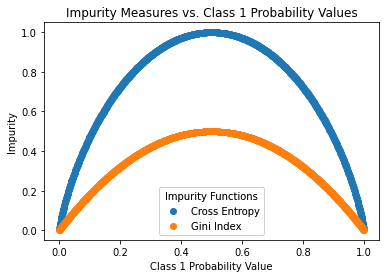

In [17]:
def impurity_measures_plot():

    '''
    Plots the cross entropy and gini index values with respect to the probability values of class 1.

    Args: 

    Returns:

    Notes:
        1. Please do not change the provided code
        2. Both cross entropy and gini index should be on the same scatter plot
    '''

    prob_class1_arr = np.arange(1, 1000)/1000
    ce_arr = np.array([cross_entropy(p) for p in prob_class1_arr])
    gi_arr = np.array([gini_index(p) for p in prob_class1_arr])

    # TODO:
    #### Student code starts ####
    fig, ax = plt.subplots()
    scatter1 = ax.scatter(x=prob_class1_arr, y=ce_arr, label='Cross Entropy')
    scatter2 = ax.scatter(x=prob_class1_arr, y=gi_arr, label='Gini Index')
    legend1 = ax.legend(loc="lower center", title="Impurity Functions")
    ax.add_artist(legend1)
    plt.title("Impurity Measures vs. Class 1 Probability Values")
    plt.xlabel("Class 1 Probability Value")
    plt.ylabel("Impurity")
    #### Student code ends ####

if NOTEBOOK:
  impurity_measures_plot()

## **2.2. Reduction in Impurity [6 pts]**

Recall that we also discussed information gain which is the change in entropy from the parent node to the children nodes. Gini reduction is similar to information gain except you replace entropy values with gini index.

### **2.2.1. Information Gain [3 pts, autograded]**

In [18]:
def information_gain(num_samples_parent, num_class1_parent, num_samples_child1, num_class1_child1):

    """

    Args: 
        num_samples_parent: Number of samples in the parent node
        num_class1_parent: Number of samples of class 1 in parent node
        num_samples_child1: Number of samples in the first child node
        num_class1_child1: Number of samples of class 1 in the first child node

    Returns:
        ig: Information Gain
    """

    # TODO:
    # 1. You will need to calculate cross-entropy for the parent and child nodes
    # 2. Use the above entropies to finally calculate information gain
    #### Student code starts ####
    return cross_entropy(num_class1_parent / num_samples_parent) - \
          (
              (num_samples_child1 / num_samples_parent) * cross_entropy(num_class1_child1 / num_samples_child1) + \
          (1 - (num_samples_child1 / num_samples_parent)) * cross_entropy((num_class1_parent - num_class1_child1) / (num_samples_parent - num_samples_child1))
          )
    #### Student code ends ####

assert np.abs(information_gain(100, 60, 30, 5) - 0.251) < 0.01

In [19]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_information_gain', answer = information_gain)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **2.2.2. Gini Reduction [3 pts, autograded]**

In [20]:
def gini_reduction(num_samples_parent, num_class1_parent, num_samples_child1, num_class1_child1):

    """

    Args: 
        num_samples_parent: Number of samples in the parent node
        num_class1_parent: Number of samples of class 1 in parent node
        num_samples_child1: Number of samples in the first child node
        num_class1_child1: Number of samples of class 1 in the first child node

    Returns:
        gr: Gini Reduction
    """

    # TODO:
    #### Student code starts ####
    return gini_index(num_class1_parent / num_samples_parent) - \
          (
              (num_samples_child1 / num_samples_parent) * gini_index(num_class1_child1 / num_samples_child1) + \
          (1 - (num_samples_child1 / num_samples_parent)) * gini_index((num_class1_parent - num_class1_child1) / (num_samples_parent - num_samples_child1))
          )
    #### Student code ends ####

assert np.abs(gini_reduction(100, 60, 30, 5) - 0.161) < 0.01

In [21]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_gini_reduction', answer = gini_reduction)

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# **3. Decision Tree [35 pts]**

In this section you will be training a decision tree classifier to predict the presence of diabetes in a person given various input features. The diabetes dataset that we are using is from the [2013-2014  National Health and Nutrition Examination Survey (NHANES)](https://wwwn.cdc.gov/nchs/nhanes/Default.aspx). We have reduced the dataset to only 20 features but the original dataset had over 1,800 features. `cis519_hw1_diabetes_train.csv` and `cis519_hw1_diabetes_X_test.csv` are the datasets that you would be using for training and testing respectively.

## **3.1. Load Datasets**

Read the files `cis519_hw1_diabetes_train.csv` and `cis519_hw1_diabetes_X_test.csv` into train_df and test_df respectively in the `load_diabetes_datasets` function.

In [22]:
import pandas as pd

def load_diabetes_datasets():
    '''
    Args:
        None
    Returns: 
        train_df, test_df
    '''
    
    # TODO:
    #### Student code starts ####
    return pd.read_csv("/content/cis519_hw1_diabetes_train.csv"),  pd.read_csv("/content/cis519_hw1_diabetes_X_test.csv")
    #### Student code ends ####

## **3.2. Preprocess Datasets [10 pts, autograded]**

The datasets we have provided are not ready-to-use for machine learning and requires preprocessing. We want you to perform feature selection and handle missing values in both the training and test datasets. 

### **3.2.1. Feature Selection**

For feature selection, you should retain the following features at least and experiment including/excluding the remaining features. 

- 'RIDAGEYR'
- 'BMXWAIST'
- 'BMXHT'
- 'LBXTC'
- 'BMXLEG'
- 'BMXWT'
- 'BMXBMI'
- 'RIDRETH1'
- 'BPQ020'
- 'ALQ120Q'
- 'DMDEDUC2'
- 'RIAGENDR'
- 'INDFMPIR'

The column `DIABETIC` in the training dataset is the target variable. 

### **3.2.2. Handling Missing Values**

We recommend you to drop rows with missing values in the training set. However, you should not drop rows with missing values in the test set. Instead, you should impute missing values in the test set with the mean of the corresponding columns in the training set.

In [23]:
if NOTEBOOK:
    train_df, test_df = load_diabetes_datasets()

# Preprocessing
def preprocess_datasets(train_df, test_df):
    '''
    Args:
        train_df
        test_df
    Returns:
        train_df (preprocessed)
        test_df (preprocessed)
    Note:
        1. At least the following columns should be present in the final train_df:
            - 'RIDAGEYR'
            - 'BMXWAIST'
            - 'BMXHT'
            - 'LBXTC'
            - 'BMXLEG'
            - 'BMXWT'
            - 'BMXBMI'
            - 'RIDRETH1'
            - 'BPQ020'
            - 'ALQ120Q'
            - 'DMDEDUC2'
            - 'RIAGENDR'
            - 'INDFMPIR'
            - 'DIABETIC'
        2. test_df will have all the columns in train_df except the 'DIABETIC' column 
        3. Drop any rows in train_df that have missing values
        4. DO NOT drop rows with missing values test_df. Impute missing values in test_df with the means of the corresponding columns in train_df. 
    '''
    # TODO:
    #### Student code starts ####
    pro_train_df = train_df[['RIDAGEYR', 'BMXWAIST', 'BMXHT', 'LBXTC', 'BMXLEG', 'BMXWT', 'BMXBMI', 'RIDRETH1', 'BPQ020', 'ALQ120Q', 'DMDEDUC2',
                            'RIAGENDR',  'INDFMPIR', 'DIABETIC']].dropna()
    pro_test_df = test_df[['RIDAGEYR', 'BMXWAIST', 'BMXHT', 'LBXTC', 'BMXLEG', 'BMXWT', 'BMXBMI', 'RIDRETH1', 'BPQ020', 'ALQ120Q', 'DMDEDUC2',
                            'RIAGENDR',  'INDFMPIR']].fillna(test_df.mean())
    return pro_train_df, pro_test_df
    #### Student code ends ####


In [24]:
if NOTEBOOK:
    # PennGrader Grading Cell
    grader.grade(test_case_id = 'test_preprocess_datasets', answer = preprocess_datasets(train_df, test_df))

Error: Malformed payload.


## **3.3. Decision Tree Training with Pruning [14 pts autograded]**

Next, we will be fitting a decision tree classifier and prune the tree appropriately. The `DecisionTreeClassifier` in scikit-learn uses a way of pruning called **Minimal Cost-Complexity Pruning**. We won't cover the specifics, but you can learn more from this [link](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning) if you wish. But, you don't need to learn the details in order to use it effectively. The amount of pruning is entirely dependent on the value of the `ccp_alpha` parameter. In order to tune the `ccp_alpha` parameter, you will use [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html). The purpose of cross-validation is to estimate how well a model will generalize on unseen data.

Implement the function `best_ccp_alpha_f1` to do automatic tuning of the `ccp_alpha` parameter.  Your function should vary the value of the `ccp_alpha` parameter and return the value for `ccp_alpha` with the highest cross-validation F1 score over the given dataset `train_df`. The sklearn library has a [built-in function](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.cost_complexity_pruning_path) to generate a list of effective ccp_alphas. Given the imbalanced nature of the dataset, most of the people in the data set are non-diabetic. You can get a model with very high test accuracy by always predicting no one is diabetic. To address this problem, more importance should be given to the [F1 score](https://en.wikipedia.org/wiki/F-score) of your model rather than the classification accuracy.

Once you are done with your modeling process, test your model on the test dataset and output your predictions into the PennGrader.

For this problem, you need to have at least 80% accuracy and a F1 score of 0.2 on the test dataset to get full points.

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

if NOTEBOOK:
    train_df, test_df = preprocess_datasets(train_df, test_df)

def best_ccp_alpha_f1(train_df):
    """
    Returns the pruning parameter (best_ccp_alpha) with the highest cross-validation F1 score along with the 
    five cross-validation F1 scores corresponding (cv_f1_scores).

    Args:
        train_df

    Returns:
        best_ccp_alpha: the tuned best ccp alpha value
        cv_f1_scores: the five cross-validation F1 scores

    """

    # TODO:
    #### Student code starts ####
    DT = DecisionTreeClassifier(random_state=0)
    x = train_df[['RIDAGEYR', 'BMXWAIST', 'BMXHT', 'LBXTC', 'BMXLEG', 'BMXWT', 'BMXBMI', 'RIDRETH1', 'BPQ020', 'ALQ120Q', 'DMDEDUC2',
                            'RIAGENDR',  'INDFMPIR']]
    y = train_df['DIABETIC']
    path = DT.cost_complexity_pruning_path(x, y)
    ccp_alphas = path.ccp_alphas
    best_values = (0,0)

    for alpha in ccp_alphas:
      clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
      f1 = np.mean(cross_val_score(clf, x, y, cv=5, scoring='f1'))
      if f1 > best_values[1]:
        best_values = (alpha, f1)
    
    best_ccp_alpha = best_values[0]
    DT2 = DecisionTreeClassifier(random_state=0, ccp_alpha=best_ccp_alpha)
    cv_f1_scores = cross_val_score(DT2, x, y, cv=5, scoring='f1')

    return best_ccp_alpha, cv_f1_scores
    #### Student code ends ####    

def refit_and_predict(train_df, test_df, best_ccp_alpha):
    """
    Fit a decision tree classifier on the training data using the best_ccp_alpha value and output the predictions on the
    test set.

    Args:
        train_df
        test_df
        best_ccp_alpha

    Returns:
        y_test_pred: The predicted values for the test set
    """

    # TODO:
    #### Student code starts ####
    DT = DecisionTreeClassifier(random_state=0, ccp_alpha=best_ccp_alpha)
    x = train_df[['RIDAGEYR', 'BMXWAIST', 'BMXHT', 'LBXTC', 'BMXLEG', 'BMXWT', 'BMXBMI', 'RIDRETH1', 'BPQ020', 'ALQ120Q', 'DMDEDUC2',
                            'RIAGENDR',  'INDFMPIR']]
    y = train_df['DIABETIC']
    DT.fit(x, y)
    y_test_pred = DT.predict(test_df)
    return y_test_pred
    #### Student code starts ####

if NOTEBOOK:
    best_ccp_alpha, cv_f1_scores = best_ccp_alpha_f1(train_df)
    y_test_pred = refit_and_predict(train_df, test_df, best_ccp_alpha)

In [26]:
if NOTEBOOK:
    # PennGrader Grading Cell
    grader.grade(test_case_id = 'test_refit_and_predict', answer = y_test_pred)

Correct! You earned 14/14 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **3.4. Computing Confidence Intervals [5 pts, autograded]**

Even though you may have computed the average F1 score across the held-out folds during cross validation, how confident can you be that the number you computed is the true F1 score for that set of features? If you try rerunning your code with a different random seed, you may actually get a different F1 score. But which one is right?

In order to answer this question, we will compute a confidence interval based on the Student's t-distribution, which will tell us with 99\% confidence that the true mean is within a lower and upper bound. To compute the confidence interval, we need to compute the sample mean, $\bar{x}$, sample standard deviation, $S$, and the number of observations for each classifier, $n$. ***In our specific case, the number of observations should be 5 because we have 5 reported F1 scores from cross-validation.***

Then, the confidence interval is computed by
    
$$\bar{x} \pm t \cdot \frac{S}{\sqrt{n}}$$

Here, $t$ is the critical value, which we can look up using the provided t-table (https://www.stat.colostate.edu/inmem/gumina/st201/pdf/Utts-Heckard_t-Table.pdf). For example, when $n=10$, if we are looking for a 99\% confidence interval, then the number in the 99\% confidence column with degrees of freedom of $n-1=9$ would be $t=3.25$. Then, we can plug in all of the statistics into the confidence interval formula and get a range of values for which we are 99\% confident that the true F1 score of the classifier falls between.

For this computation, we should use the unbiased estimator of the variance, which means that the degrees of freedom on the standard deviation calculation must be set. Look in the optional arguments of np.std to learn more.

In [27]:
def calculate_confidence_interval(cv_f1_scores):
    '''
    Args:
        cv_f1_scores      :   np.array, reported cross-validation F1 scores
    Returns:
        interval    :   np.array, lower bound and upper bound of the 99% confidence interval
    '''
    
    # TODO:
    #### Student code starts ####
    x_bar = np.mean(cv_f1_scores)
    s = np.std(cv_f1_scores, ddof=1)
    t = 4.60
    return np.array([x_bar - t*(s/np.sqrt(5)), x_bar + t*(s/np.sqrt(5))])
    #### Student code starts ####

In [28]:
def test_confidence_intervals():
    data = np.array([15.6, 16.2, 22.5, 20.5, 16.4])
    result = np.round(calculate_confidence_interval(data), 3)
    interval = np.array([11.918, 24.562])
    assert (np.array_equal(interval, result))

test_confidence_intervals()

In [29]:
# PennGrader Grading Cell
grader.grade(test_case_id = 'test_confidence_intervals', answer = calculate_confidence_interval)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **3.5. Performance Table [6 pts, manually graded]**

Repeat the process for two other sets of features and present a performance table (like the one shown below) that compares the F1 scores and confidence intervals of the three sets of features, indicating which one is your chosen best set. Remember that each set should include the 13 features mentioned earlier. As mentioned earlier, submit this table along with the written homework solutions as this is manually graded.

---

S.No. | Features | Best CCP Alpha | Mean Cross-validation F1 Score | Cross-validation F1 Score Confidence Interval
--- | --- | --- | --- | ---
1 | 'RIDAGEYR', 'BMXWAIST', 'BMXHT', 'LBXTC', 'BMXLEG', 'BMXWT', 'BMXBMI', 'RIDRETH1', 'BPQ020', 'ALQ120Q', 'DMDEDUC2', 'RIAGENDR', 'INDFMPIR' | 0.00184 | 0.28193 | [0.05308565, 0.51077811]
2 | 'RIDAGEYR', 'BMXWAIST', 'BMXHT', 'LBXTC', 'BMXLEG', 'BMXWT', 'BMXBMI', 'RIDRETH1', 'BPQ020', 'ALQ120Q', 'DMDEDUC2', 'RIAGENDR', 'INDFMPIR', 'BPAARM' | 0.00048 | 0.33463 | [0.22275312, 0.44652636]
3 | 'RIDAGEYR', 'BMXWAIST', 'BMXHT', 'LBXTC', 'BMXLEG', 'BMXWT', 'BMXBMI', 'RIDRETH1', 'BPQ020', 'ALQ120Q', 'DMDEDUC2', 'RIAGENDR', 'INDFMPIR', 'BPAARM', 'LBDSGBSI' | 0.00112 | 0.30591 | [0.15757488, 0.45426204]


# Submission

- Submit the notebook as a `.ipynb` file to the coding portion of the Gradescope submission. This can be done in Google Colab via the `File - Download .ipynb` menu option.